### Main Config

In [6]:
# Data_path = "/content/drive/MyDrive/Behavioral/Data"
# Models_path = "/content/drive/MyDrive/Behavioral/Models"
Data_path = "B:/Projects/BehavioralPsychology/Fortune_company_opinion_mining/Data"
Models_path = "B:/Projects/BehavioralPsychology/Fortune_company_opinion_mining/Models"

random_seed = 42
notebook_env = "test" # "test" for experimenting, "final" for final execution

import os
import sys
sys.path.append('..')

from src.preprocess import preprocess_text
from src import ioFuncs

### Google Colab Configs

In [2]:
!pip uninstall -y pandas numpy scipy
!pip install pandas scipy==1.10.1

  Using cached pandas-2.3.0-cp312-cp312-win_amd64.whl.metadata (19 kB)


ERROR: Ignored the following yanked versions: 1.11.0, 1.14.0rc1
ERROR: Could not find a version that satisfies the requirement scipy==1.10.1 (from versions: 0.8.0, 0.9.0, 0.10.0, 0.10.1, 0.11.0, 0.12.0, 0.12.1, 0.13.0, 0.13.1, 0.13.2, 0.13.3, 0.14.0, 0.14.1, 0.15.0, 0.15.1, 0.16.0, 0.16.1, 0.17.0, 0.17.1, 0.18.0, 0.18.1, 0.19.0, 0.19.1, 1.0.0, 1.0.1, 1.1.0, 1.2.0, 1.2.1, 1.2.2, 1.2.3, 1.3.0, 1.3.1, 1.3.2, 1.3.3, 1.4.0, 1.4.1, 1.5.0, 1.5.1, 1.5.2, 1.5.3, 1.5.4, 1.6.0, 1.6.1, 1.9.2, 1.9.3, 1.11.0rc1, 1.11.0rc2, 1.11.1, 1.11.2, 1.11.3, 1.11.4, 1.12.0rc1, 1.12.0rc2, 1.12.0, 1.13.0rc1, 1.13.0, 1.13.1, 1.14.0rc2, 1.14.0, 1.14.1, 1.15.0rc1, 1.15.0rc2, 1.15.0, 1.15.1, 1.15.2, 1.15.3, 1.16.0rc1)

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for scipy==1.10.1


In [ ]:
%%capture
!pip install emoji
!pip install langdetect
!pip install nltk
!pip install tqdm
!pip install langid
!pip install scipy
!pip install genism
!pip install pyLDAvis
!pip install gensim
# !pip install scipy --upgrade



ModuleNotFoundError: No module named 'google'

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Project

b:\Projects\BehavioralPsychology\Fortune_company_opinion_mining\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
import kagglehub
import os
import json
import pandas as pd
import spacy
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import emoji
import re
from langdetect import detect, detect_langs
import nltk
import string
import numpy as np
import pyLDAvis
import pyLDAvis.gensim
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from gensim.test.utils import common_texts
from gensim.corpora.dictionary import Dictionary
from tqdm import tqdm
import langid

from ast import pattern
tqdm.pandas()

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

### Download Data from Kaggle/Load Data

In [5]:
# import sys

# # setting path
# sys.path.append('..')
# from src import ioFuncs

# ioFuncs.read_raw_main(Data_path=Data_path)

In [4]:
# columns = ["Company", "Text", "Source"]
# atts_temp = ["tweets", "comments", "posts"]
# source_dic = {"tweets": "Twitter", "comments": "Reddit-Comments", "posts": "Reddit-Posts"}
# mp_doc_list = []

# for company in data:
#   for text_list in atts_temp:
#     if text_list in company:
#       for text in company[text_list]:
#         mp_doc_list.append([company["company"], text["text"], source_dic[text_list]])


# data_df = pd.DataFrame(mp_doc_list, columns=columns)
# data_df

In [6]:
# enriched_data = pd.merge(fortune_company_list[["Company", "Ticker", "Sector", "Industry"]], data_df, left_on="Company", right_on="Company")
# enriched_data.sample(10, random_state=random_seed)

In [ ]:
# # compare unique companies in the enriched dataset and main dataset
# enriched_companies = enriched_data["Company"].unique()
# main_companies = data_df["Company"].unique()

# print(f"Number of companies in the enriched dataset: {len(enriched_companies)}")
# print(f"Number of companies in the main dataset: {len(main_companies)}")

Number of companies in the enriched dataset: 953
Number of companies in the main dataset: 953


In [ ]:
data_df = ioFuncs.read_enriched(data_path=Data_path)
data_df.head()

Loaded file from data dir.


,Unnamed: 0,Company,Ticker,Sector,Industry,Text,Source
0,0,Walmart,WMT,Retailing,General Merchandisers,$GOOGL $GOOG $WMT Google And Walmart Payment A...,Twitter
1,1,Walmart,WMT,Retailing,General Merchandisers,Can $PHNIX become the first meme coin to dethr...,Twitter
2,2,Walmart,WMT,Retailing,General Merchandisers,"Walmart $WMT \n\nThe Laughing Cow Cheese, 32 p...",Twitter
3,3,Walmart,WMT,Retailing,General Merchandisers,Some of the most iconic businesses ever \n\n1....,Twitter
4,4,Walmart,WMT,Retailing,General Merchandisers,Walmart $WMT currently has 1.05 Billion Square...,Twitter


## Preprocessing the texts

In [16]:
# show duplicates
data_df[data_df.duplicated()].sample(10, random_state=random_seed)

,Company,Ticker,Sector,Industry,Text,Source
110758,Nvidia,NVDA,Technology,Semiconductors and Other Electronic Components,,Reddit-Posts
133033,Nike,NKE,Apparel,Apparel,,Reddit-Posts
301841,Williams,WMB,Energy,Pipelines,,Reddit-Posts
288738,Ryder System,R,Transportation,Transportation and Logistics,"paid.\n\n*I am a bot, and this action was perf...",Reddit-Comments
243246,Loews,L,Financials,Insurance: Property and Casualty (Stock),,Reddit-Posts
375515,Darling Ingredients,DAR,"Food, Beverages & Tobacco",Food Production,,Reddit-Posts
18146,Apple,AAPL,Technology,"Computers, Office Equipment",,Reddit-Posts
123581,Intel,INTC,Technology,Semiconductors and Other Electronic Components,,Reddit-Posts
209769,Carrier Global,CARR,Industrials,Industrial Machinery,,Reddit-Posts
429535,Coherent,COHR,Technology,Semiconductors and Other Electronic Components,Passport Adjudicator here. The gender changes ...,Reddit-Posts


In [ ]:
temp_df = ioFuncs.read_preprocessed(data_path=Data_path, notebook_env=notebook_env)
print(temp_df.head())

if temp_df is None:
  # drop duplicates
  temp_df = data_df.drop_duplicates()
  temp_df.describe()

  ### Sample for Analysis
  # **Sampling of Enriched Data**: This is done to make experiments lighter, for final analysis all data will be used.
  if notebook_env == "test":
    sample_data_df = data_df.sample(50000, random_state=random_seed)
  elif notebook_env == "final":
    sample_data_df = data_df.copy()

  temp_df = sample_data_df.copy()
  temp_df["Text"] = temp_df.progress_apply(lambda row: preprocess_text(row["Text"], row.name, [row["Company"], row["Ticker"]]), axis=1)
  temp_df

  temp_df = temp_df[temp_df["Text"] != ""]
  temp_df.describe()

  temp_df.to_csv(dataset_path)
  print("File saved to drive.")

Dataset loaded from drive.
   Unnamed: 0  Company Ticker     Sector               Industry  \
0           0  Walmart    WMT  Retailing  General Merchandisers   
1           1  Walmart    WMT  Retailing  General Merchandisers   
2           2  Walmart    WMT  Retailing  General Merchandisers   
3           3  Walmart    WMT  Retailing  General Merchandisers   
4           4  Walmart    WMT  Retailing  General Merchandisers   

                                                Text   Source  
0  $googl $goog $targetedcompany google and targe...  Twitter  
1  can $phnix become the first meme coin to dethr...  Twitter  
2  targetedcompany $targetedcompany the laughing ...  Twitter  
3  some of the most iconic businesses ever . $mcd...  Twitter  
4  targetedcompany $targetedcompany currently has...  Twitter  


In [7]:
temp_df.head()

,Unnamed: 0,Company,Ticker,Sector,Industry,Text,Source
0,0,Walmart,WMT,Retailing,General Merchandisers,$googl $goog $targetedcompany google and targe...,Twitter
1,1,Walmart,WMT,Retailing,General Merchandisers,can $phnix become the first meme coin to dethr...,Twitter
2,2,Walmart,WMT,Retailing,General Merchandisers,targetedcompany $targetedcompany the laughing ...,Twitter
3,3,Walmart,WMT,Retailing,General Merchandisers,some of the most iconic businesses ever . $mcd...,Twitter
4,4,Walmart,WMT,Retailing,General Merchandisers,targetedcompany $targetedcompany currently has...,Twitter


## Vectorization and Lemmatization

In [5]:
target_filter = "targetedcompany"

def tokenize_text(text):

  # tokenize with NLTK
  doc = nlp_pip(text)

  # remove punct and stopwords and targetCompany
  tokens = []
  for token in doc:
    if (not token.is_punct) and (not token.is_stop) and (token.text != target_filter):
      tokens.append(token.lemma_)

  return tokens

# def edit_tokens(doc_list):

#   # remove punct and stopwords and targetCompany
#   tokens = []
#   for token in doc_list:
#     if (not token.is_punct) and (not token.is_stop) and (token.text != target_filter):
#       tokens.append(token.lemma_)

#   return tokens

In [ ]:
# # tesing the tokenization
# sample = temp_df.sample(random_state=random_seed, n= 100)[["Text"]]
# sample["Tokens"] = sample[["Text"]].apply(lambda row: tokenize_text(row["Text"]), axis=1)
# sample

In [ ]:
# def print_tokenization(row):
#   test = textwrap.fill(row["Text"], width=150)
#   tokenized = textwrap.fill(", ".join(row["Tokens"]), width=150)
#   print(f"Main text: {test}, \n **************** \nTokenized Text: {tokenized}\n")


# sample.apply(lambda row: print_tokenization(row), axis=1)

In [1]:

# temp = temp_df.sample(100, random_state=random_seed)["Text"]
# listOfDocs = list(tqdm(nlp_pip.pipe(temp), total=len(temp)))
# listOfTokens = pd.Series([token for token in listOfDocs])
# tokenized_texts = listOfTokens.progress_apply(lambda x: edit_tokens(x))

In [6]:
nlp_pip = spacy.load("en_core_web_sm")

if notebook_env == "test":
  dataset_name = "spacy_tokenized_sample.pkl"
else:
  dataset_name = "spacy_tokenized_allData.pkl"

dataset_path = os.path.join(Data_path, dataset_name)

if os.path.isfile(dataset_path):
  tokenized_texts = pd.read_pickle(dataset_path)
  print("Loaded from drive.")
else:
  # # pass the texts through the spacy pipeline in a statistical manner
  # docGenerators = tqdm(nlp_pip.pipe(temp_df["Text"], batch_size=500), total=len(temp_df["Text"]))
  # listOfDocs = list(docGenerators)

  # # use generator to extract tokens
  # listOfTokens = pd.Series([token for token in listOfDocs])
  # tokenized_texts = listOfTokens.progress_apply(lambda x: edit_tokens(x))

  tokenized_texts = temp_df.progress_apply(lambda row: tokenize_text(row["Text"]), axis=1)
  tokenized_texts.to_pickle(dataset_path)
  print("Saved to drive.")

100%|██████████| 345786/345786 [3:17:49<00:00, 29.13it/s]


Saved to drive.


In [7]:
def identical_analyzer(token):
  return token

vectorizer = CountVectorizer(analyzer=identical_analyzer, min_df=0.005, max_df=0.995)
bow = vectorizer.fit_transform(tokenized_texts)

In [8]:
vectorizer.get_feature_names_out()[:100]

array(['$', '+', '<', '=', '>', 'ability', 'able', 'absolute',
       'absolutely', 'accept', 'access', 'accord', 'account', 'accurate',
       'achieve', 'act', 'action', 'active', 'activity', 'actual',
       'actually', 'ad', 'add', 'addition', 'additional', 'additionally',
       'address', 'adjust', 'admit', 'adult', 'advance', 'advanced',
       'advantage', 'adventure', 'advice', 'affect', 'afford', 'afraid',
       'age', 'agency', 'agent', 'ago', 'agree', 'ahead', 'ai', 'aim',
       'air', 'alert', 'align', 'allow', 'alternative', 'amazing',
       'amazon', 'amd', 'america', 'american', 'analysis', 'analyst',
       'and/or', 'animal', 'announce', 'annoying', 'annual', 'answer',
       'anti', 'anxiety', 'anybody', 'anymore', 'anyways', 'apart',
       'apartment', 'app', 'apparently', 'appeal', 'appear', 'apple',
       'application', 'apply', 'appointment', 'appreciate', 'approach',
       'approve', 'april', 'area', 'argue', 'arm', 'arrive', 'art',
       'article', 'asid

In [10]:
len(vectorizer.vocabulary_)

1623

In [11]:
# dict of terms and their frequencies
term_frequencies = {}
feats = vectorizer.get_feature_names_out()
freqs = bow.toarray().sum(axis=0)

for feature, frequency in zip(feats, freqs):
  term_frequencies[feature] = frequency

wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(term_frequencies)

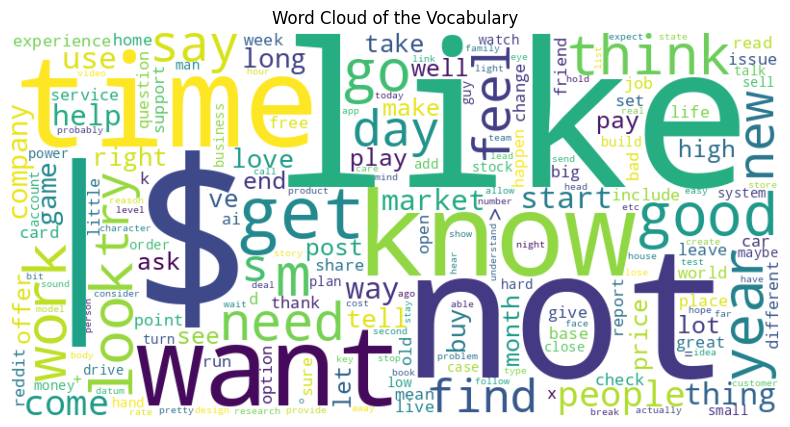

In [12]:
# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title(f"Word Cloud of the Vocabulary")
plt.show()

In [13]:
print(f"Shape of the BOW: {bow.shape}")
print(f"Number of non-zero values: {bow.nnz}")

Shape of the BOW: (345786, 1623)
Number of non-zero values: 9475412


In [ ]:
tf_idf = TfidfTransformer()

In [ ]:
tf_idf_text = tf_idf.fit_transform(bow)

In [ ]:
tf_idf_text.shape

(35192, 1622)

## Topic Modeling The texts
Initially, we need to understand what sort of content we have. This will help deciding if we should go with data based topics or anchored topics.

In [14]:
dictionary = Dictionary(tokenized_texts)
corpus = [dictionary.doc2bow(text) for text in tokenized_texts]

In [ ]:
topic_counts = range(2,30,2)

In [ ]:
# models = []
# c_v_coherence = []

# for i in tqdm(topic_counts):
#   # check if model is already in drive
#   model_path_temp = os.path.join(Models_path, "GensimLdaModel_SpacyTokens_TopicCount" + str(i))

#   if os.path.isfile(model_path_temp):
#     lda_model = LdaModel.load(model_path_temp)
#   else:
#     lda_model = LdaModel(
#         corpus=corpus,
#         id2word=dictionary,
#         num_topics=i,
#         random_state=random_seed,
#         passes=10,
#         iterations=50
#     )

#     # save the trained model
#     lda_model.save(model_path_temp)

#   # append the model to a list
#   models.append(lda_model)


#   cm = CoherenceModel(model=lda_model, texts=tokenized_texts, dictionary=dictionary, coherence='c_v')
#   c_v_coherence.append(cm.get_coherence())

# metrics = pd.DataFrame({"Topic_Count": list(topic_counts), "c_v": c_v_coherence})
# metrics.head()

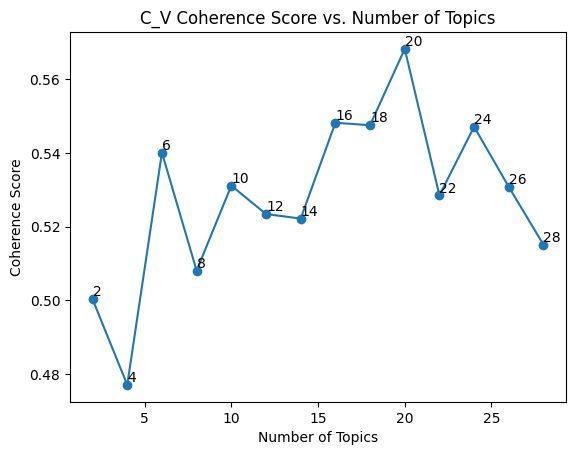

In [ ]:
# # plot coherence by the topic count
# import matplotlib.pyplot as plt

# plt.plot(metrics["Topic_Count"], metrics["c_v"], marker='o')
# plt.xlabel('Number of Topics')
# plt.ylabel('Coherence Score')
# plt.title('C_V Coherence Score vs. Number of Topics')

# for i, txt in enumerate(metrics["Topic_Count"]):
#   plt.text(metrics["Topic_Count"][i], metrics["c_v"][i], f'{txt}', ha='left', va='bottom') # Format label to 2 decimal places


- 1: ranting probably
- 2: Intimate fiction
- 3: Personal growth
- 4: Jobs (Mostly tech jobs)
- 5: Financial Markets
- 6: Personal finance
- 7: Potentially daily stories and personal narratives?!
- 8: Health issues
- 9: Online stores - Purchases
- 10: Gaming
- 11: Computer technology (similar to 15)
- 12: Company news / Market news
- 13: Political news and posts
- 14: Streaming channels and relevant content (YT, Prime, ...)
- 15: Computer technology and gaming hardware
- 16: Books, Movies, Fiction, ...
- 17: Subreddit moderaters and banners in reddit
- 18: Company applications and policies
- 19: Gaming
- 20: Lifestyle

In [17]:
# retrain with 20 topics or load back
model_path_temp = os.path.join(Models_path, "GensimLdaModel_SpacyTokens_TopicCount20_allData")

if os.path.isfile(model_path_temp):
  lda_model = LdaModel.load(model_path_temp)
else:
  lda_model = LdaModel(
      corpus=corpus,
      id2word=dictionary,
      num_topics=20,
      random_state=random_seed,
      passes=10,
      iterations=50
  )
  # save the trained model
  lda_model.save(model_path_temp)

pyLDAvis.enable_notebook()
# top_model_index = metrics[metrics["Topic_Count"] == 20].index[0]
pyLDAvis.gensim.prepare(lda_model, corpus, dictionary, mds="mmds", R=50)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
19    -0.414252 -0.147399       1        1  17.327736
6     -0.451141 -0.000083       2        1  10.561462
8     -0.026003 -0.244423       3        1   8.155803
10    -0.201940 -0.396099       4        1   7.938017
11    -0.205176  0.031687       5        1   7.915610
12    -0.162710 -0.108972       6        1   6.473095
2     -0.253057  0.182708       7        1   6.315336
3     -0.322248 -0.278683       8        1   5.224683
15     0.047125 -0.462118       9        1   5.068990
1      0.222965 -0.393809      10        1   5.011352
16     0.226062 -0.186466      11        1   4.076427
17     0.160659  0.400092      12        1   2.457005
9     -0.357491  0.324179      13        1   2.074863
14     0.216767  0.119370      14        1   1.991981
4     -0.139257  0.471054      15        1   1.905955
0      0.008777  0.397097      16        1   1.799663
18     0.424463 -0.201786      17        1   1.622309
7      0.479339 -0.009232      18        1   1.504704
5      0.416776  0.170812      19        1   1.501806
13     0.330344  0.332070      20        1   1.073202, topic_info=          Term           Freq          Total Category  logprob  loglift
2339         |  215944.000000  215944.000000  Default  50.0000  50.0000
0            $  264739.000000  264739.000000  Default  49.0000  49.0000
326        not  172762.000000  172762.000000  Default  48.0000  48.0000
642          >   58801.000000   58801.000000  Default  47.0000  47.0000
1011         x   62202.000000   62202.000000  Default  46.0000  46.0000
...        ...            ...            ...      ...      ...      ...
1443    driver    6411.531220   10789.303104  Topic20  -3.6598   4.0141
2188     giant    2181.730621    3627.098429  Topic20  -4.7378   4.0262
1822  favorite    4583.286607   12110.816942  Topic20  -3.9955   3.5628
1406      rock    2781.925202    7337.772469  Topic20  -4.4947   3.5646
615     online    1191.803893   17180.395312  Topic20  -5.3424   1.8662

[1762 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
0         9  0.999994       $
618       3  0.011377       +
618       4  0.032316       +
618       5  0.001230       +
618       7  0.103129       +
...     ...       ...     ...
366       6  0.193132    year
366       9  0.049299    year
1415      7  0.999552  yellow
333       1  0.999708     you
2339     18  0.999994       |

[2943 rows x 3 columns], R=50, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[20, 7, 9, 11, 12, 13, 3, 4, 16, 2, 17, 18, 10, 15, 5, 1, 19, 8, 6, 14])

In [ ]:
topics = {
    1: "ranting probably",
    2: "Intimate fiction",
    3: "Personal growth",
    4: "Jobs (Mostly tech jobs)",
    5: "Financial Markets",
    6: "Personal finance",
    7: "Potentially daily stories and personal narratives?!",
    8: "Health issues",
    9: "Online stores - Purchases",
    10: "Gaming",
    11: "Computer technology (similar to 15)",
    12: "Company news / Market news",
    13: "Political news and posts",
    14: "Streaming channels and relevant content (YT, Prime, ...)",
    15: "Computer technology and gaming hardware",
    16: "Books, Movies, Fiction, ...",
    17: "Subreddit moderaters and banners in reddit",
    18: "Company applications and policies",
    19: "Gaming",
    20: "Lifestyle"
}

In [18]:
lda_model.get_topics().shape

(20, 451445)

In [ ]:
temp_df.loc[50]["Text"]

'my players asked me about additional levels for the demi-humans. a few don\'t jive because they cannot get to level or do not like the idea of flip-flopping between classes. i was tinkering with the concept of demi-human occupational classes (think like "elf targetedcompany" that the player can pour xp to gain more levels (and scaling bonus hp) and also to get some extra unique elder dwarf/hobbit/elf skills that are ever present no matter the demi-human pc\'s current class. i was wondering if any of y\'all have done the same or have any thoughts on this addition'

In [ ]:
tokenized_texts[50]

['player',
 'ask',
 'additional',
 'level',
 'demi',
 'human',
 'jive',
 'level',
 'like',
 'idea',
 'flip',
 'flopping',
 'class',
 'tinker',
 'concept',
 'demi',
 'human',
 'occupational',
 'class',
 'think',
 'like',
 'elf',
 'player',
 'pour',
 'xp',
 'gain',
 'level',
 'scale',
 'bonus',
 'hp',
 'extra',
 'unique',
 'elder',
 'dwarf',
 'hobbit',
 'elf',
 'skill',
 'present',
 'matter',
 'demi',
 'human',
 'pc',
 'current',
 'class',
 'wonder',
 'you',
 'thought',
 'addition']

In [ ]:
corpus[50]

[(48, 1),
 (96, 1),
 (270, 1),
 (297, 2),
 (320, 1),
 (552, 3),
 (733, 1),
 (864, 1),
 (865, 1),
 (1008, 1),
 (1025, 1),
 (1110, 1),
 (1186, 1),
 (1187, 1),
 (1188, 1),
 (1189, 3),
 (1190, 1),
 (1191, 1),
 (1192, 2),
 (1193, 1),
 (1194, 1),
 (1195, 1),
 (1196, 1),
 (1197, 1),
 (1198, 3),
 (1199, 1),
 (1200, 3),
 (1201, 1),
 (1202, 1),
 (1203, 2),
 (1204, 1),
 (1205, 1),
 (1206, 1),
 (1207, 1),
 (1208, 1),
 (1209, 1),
 (1210, 1)]

In [ ]:
dictionary.doc2bow(tokenized_texts[50])

[(48, 1),
 (96, 1),
 (270, 1),
 (297, 2),
 (320, 1),
 (552, 3),
 (733, 1),
 (864, 1),
 (865, 1),
 (1008, 1),
 (1025, 1),
 (1110, 1),
 (1186, 1),
 (1187, 1),
 (1188, 1),
 (1189, 3),
 (1190, 1),
 (1191, 1),
 (1192, 2),
 (1193, 1),
 (1194, 1),
 (1195, 1),
 (1196, 1),
 (1197, 1),
 (1198, 3),
 (1199, 1),
 (1200, 3),
 (1201, 1),
 (1202, 1),
 (1203, 2),
 (1204, 1),
 (1205, 1),
 (1206, 1),
 (1207, 1),
 (1208, 1),
 (1209, 1),
 (1210, 1)]

In [ ]:
pd.Series(lda_model.get_document_topics(corpus))

,0
0,"[(3, 0.10022936), (7, 0.59704226), (14, 0.2253..."
1,"[(1, 0.045905188), (7, 0.2529791), (15, 0.5091..."
2,"[(7, 0.5538551), (18, 0.18218757), (19, 0.1984..."
3,"[(3, 0.36894682), (7, 0.5560394)]"
4,"[(0, 0.01451928), (2, 0.06326705), (3, 0.02228..."
...,...
35187,"[(2, 0.24925978), (3, 0.13301566), (7, 0.36475..."
35188,"[(1, 0.14998831), (7, 0.7214166)]"
35189,"[(1, 0.10922997), (3, 0.038683355), (4, 0.2299..."
35190,"[(1, 0.035617437), (2, 0.043612584), (3, 0.268..."


### Eval and vis

In [ ]:
# Map topic index to a descriptive title
topic_titles = {
    0: "Casual Online Chatter",
    1: "Book or Media Reviews",
    2: "Consumer Goods / Retail",
    3: "Finance & Business News",
    4: "Job Applications & Recruitment",
    5: "Tech Support & Software Use"
}


In [ ]:
# Count topics
topic_counts = temp_df["Topic"].value_counts().sort_index()

# Map the index to topic titles for labeling
labels = [topic_titles[i] for i in topic_counts.index]

# Plot with titles as x-axis labels
plt.figure(figsize=(10, 6))
plt.bar(labels, topic_counts.values)
plt.xticks(rotation=45, ha='right')
plt.title("Document Counts per Topic")
plt.ylabel("Number of Documents")
plt.tight_layout()
plt.show()

In [ ]:
# Group data by sector and topic, and count occurrences
sector_topic_counts = temp_df.groupby(['Sector', 'Topic'])['Topic'].count().unstack()

# Get sector and topic labels
sectors = sector_topic_counts.index
topic_labels = [topic_titles[i] for i in range(lda.n_components)]

# Create the stacked bar chart
fig, ax = plt.subplots(figsize=(12, 6))

# Plot bars for each topic within each sector
bottom = [0] * len(sectors)  # Initialize bottom for stacking
for i, topic_label in enumerate(topic_labels):
    ax.bar(sectors, sector_topic_counts[i], label=topic_label, bottom=bottom)
    bottom = [bottom[j] + sector_topic_counts[i][j] for j in range(len(sectors))]

# Set chart labels and formatting
ax.set_xlabel("Sector")
ax.set_ylabel("Number of Documents")
ax.set_title("Topic Distribution Across Sectors")
ax.legend(title="Topics", bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside the plot
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

In [ ]:
# Assuming your DataFrame is named 'temp_df' and contains 'Source' and 'Topic' columns

# Group data by source and topic, and count occurrences
source_topic_counts = temp_df.groupby(['Source', 'Topic'])['Topic'].count().unstack()

# Get source and topic labels
sources = source_topic_counts.index
topic_labels = [topic_titles[i] for i in range(lda.n_components)]  # Assuming you have topic_titles defined

# Create the stacked bar chart
fig, ax = plt.subplots(figsize=(12, 6))

# Plot bars for each topic within each source
bottom = [0] * len(sources)  # Initialize bottom for stacking
for i, topic_label in enumerate(topic_labels):
    ax.bar(sources, source_topic_counts[i], label=topic_label, bottom=bottom)
    bottom = [bottom[j] + source_topic_counts[i][j] for j in range(len(sources))]

# Set chart labels and formatting
ax.set_xlabel("Source")
ax.set_ylabel("Number of Documents")
ax.set_title("Topic Distribution Across Sources")
ax.legend(title="Topics", bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside the plot
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

In [ ]:
# Get feature names (words) from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Create a dictionary to store the word clouds for each topic
topic_wordclouds = {}

# Iterate through each topic
for topic_index in range(lda.n_components):
    # Get documents belonging to the current topic
    topic_documents = temp_df[temp_df["Topic"] == topic_index]["Text"]

    # Create a frequency dictionary for words in the topic documents
    word_frequencies = {}
    for doc in topic_documents:
        for word in tokenize_text(doc):  # Use your tokenize_text function
            if word in feature_names:
                word_frequencies[word] = word_frequencies.get(word, 0) + 1

    # Create a WordCloud object
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_frequencies)

    # Store the word cloud in the dictionary
    topic_wordclouds[topic_index] = wordcloud

    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud for Topic {topic_index}: {topic_titles[topic_index]}")  # Assuming you have topic_titles
    plt.show()
